# EDA and Cleaning - Ames Housing Data

This notebook contains all data cleaning and Exploratory Data Analysis performed on Ames Housing Data

## Initial comments from data description review

- "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). **I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations)** before assigning it to students."

- "... if the purpose is to once again create a common use model to estimate a “typical” sale, it is in the modeler’s best interest to remove any observations that do not seem typical **(such as foreclosures or family sales)**."

## Interesting features after reading data description:

- Lot Shape
- Land Contour
- Lot Config
- Neighborhood
- Building Type
- Year Built
- Year Remod/Add
- Exter Qual
- Exter Cond
- Overall Qual
- Overall Cond
- Gr Liv Area
- Bedroom
- KitchenQual
- Garage Area
- Garage Qual
- Garage Cond
- Mo Sold
- Yr Sold
- Sale Type
- Sale Condition

In [1]:
# Import the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV

In [2]:
# Import data
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
# List interesting features from reading data description
interesting = [
    'Lot Shape',
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Bldg Type',
    'Year Built',
    'Year Remod/Add',
    'Exter Qual',
    'Exter Cond',
    'Overall Qual',
    'Overall Cond',
    'Gr Liv Area',
    'Bedroom AbvGr',
    'Kitchen Qual',
    'Garage Area',
    'Garage Qual',
    'Garage Cond',
    'Mo Sold',
    'Yr Sold',
    'Sale Type',
    'SalePrice',
]

In [5]:
# Keep only interesting features
train = train[interesting]


In [6]:
train.head()

,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Overall Qual,...,Gr Liv Area,Bedroom AbvGr,Kitchen Qual,Garage Area,Garage Qual,Garage Cond,Mo Sold,Yr Sold,Sale Type,SalePrice
0,IR1,Lvl,CulDSac,Sawyer,1Fam,1976,2005,Gd,TA,6,...,1479,3,Gd,475.0,TA,TA,3,2010,WD,130500
1,IR1,Lvl,CulDSac,SawyerW,1Fam,1996,1997,Gd,TA,7,...,2122,4,Gd,559.0,TA,TA,4,2009,WD,220000
2,Reg,Lvl,Inside,NAmes,1Fam,1953,2007,TA,Gd,5,...,1057,3,Gd,246.0,TA,TA,1,2010,WD,109000
3,Reg,Lvl,Inside,Timber,1Fam,2006,2007,TA,TA,5,...,1444,3,TA,400.0,TA,TA,4,2010,WD,174000
4,IR1,Lvl,Inside,SawyerW,1Fam,1900,1993,TA,TA,6,...,1445,3,TA,484.0,TA,TA,3,2010,WD,138500


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Shape       2051 non-null   object 
 1   Land Contour    2051 non-null   object 
 2   Lot Config      2051 non-null   object 
 3   Neighborhood    2051 non-null   object 
 4   Bldg Type       2051 non-null   object 
 5   Year Built      2051 non-null   int64  
 6   Year Remod/Add  2051 non-null   int64  
 7   Exter Qual      2051 non-null   object 
 8   Exter Cond      2051 non-null   object 
 9   Overall Qual    2051 non-null   int64  
 10  Overall Cond    2051 non-null   int64  
 11  Gr Liv Area     2051 non-null   int64  
 12  Bedroom AbvGr   2051 non-null   int64  
 13  Kitchen Qual    2051 non-null   object 
 14  Garage Area     2050 non-null   float64
 15  Garage Qual     1937 non-null   object 
 16  Garage Cond     1937 non-null   object 
 17  Mo Sold         2051 non-null   i

These columns need to be filled: 'Garage Area', 'Garage Qual', 'Garage Cond'

In [8]:
train.corr()

,Year Built,Year Remod/Add,Overall Qual,Overall Cond,Gr Liv Area,Bedroom AbvGr,Garage Area,Mo Sold,Yr Sold,SalePrice
Year Built,1.000000,0.629116,0.602964,-0.370988,0.258838,-0.042149,0.487177,-0.007083,-0.003559,0.571849
Year Remod/Add,0.629116,1.000000,0.584654,0.042614,0.322407,-0.019748,0.398999,0.011568,0.042744,0.550370
Overall Qual,0.602964,0.584654,1.000000,-0.082770,0.566701,0.053373,0.563814,0.019242,-0.011578,0.800207
Overall Cond,-0.370988,0.042614,-0.082770,1.000000,-0.109804,-0.009908,-0.137917,-0.003144,0.047664,-0.097019
Gr Liv Area,0.258838,0.322407,0.566701,-0.109804,1.000000,0.507579,0.490949,0.049644,-0.015891,0.697038
Bedroom AbvGr,-0.042149,-0.019748,0.053373,-0.009908,0.507579,1.000000,0.069940,0.068281,-0.011692,0.137067
Garage Area,0.487177,0.398999,0.563814,-0.137917,0.490949,0.069940,1.000000,0.009964,-0.003589,0.650270
Mo Sold,-0.007083,0.011568,0.019242,-0.003144,0.049644,0.068281,0.009964,1.000000,-0.147494,0.032735
Yr Sold,-0.003559,0.042744,-0.011578,0.047664,-0.015891,-0.011692,-0.003589,-0.147494,1.000000,-0.015203
SalePrice,0.571849,0.550370,0.800207,-0.097019,0.697038,0.137067,0.650270,0.032735,-0.015203,1.000000


In [9]:
train.describe()

,Year Built,Year Remod/Add,Overall Qual,Overall Cond,Gr Liv Area,Bedroom AbvGr,Garage Area,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000
mean,1971.708922,1984.190151,6.112140,5.562165,1499.330083,2.843491,473.671707,6.219893,2007.775719,181469.701609
std,30.177889,21.036250,1.426271,1.104497,500.447829,0.826618,215.934561,2.744736,1.312014,79258.659352
min,1872.000000,1950.000000,1.000000,1.000000,334.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,1953.500000,1964.500000,5.000000,5.000000,1129.000000,2.000000,319.000000,4.000000,2007.000000,129825.000000
50%,1974.000000,1993.000000,6.000000,5.000000,1444.000000,3.000000,480.000000,6.000000,2008.000000,162500.000000
75%,2001.000000,2004.000000,7.000000,6.000000,1728.500000,3.000000,576.000000,8.000000,2009.000000,214000.000000
max,2010.000000,2010.000000,10.000000,9.000000,5642.000000,8.000000,1418.000000,12.000000,2010.000000,611657.000000


<AxesSubplot:>

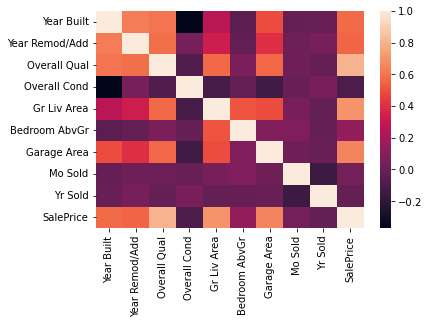

In [10]:
sns.heatmap(train.corr())

High correlation features: 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Year Built', 'Year Remod/Add'

In [11]:
numericals = [
    'Year Built',
    'Year Remod/Add',
    'Overall Qual',
    'Overall Cond',
    'Gr Liv Area',
    'Bedroom AbvGr',
    'Garage Area',
    'Mo Sold',
    'Yr Sold',
    'SalePrice'
]

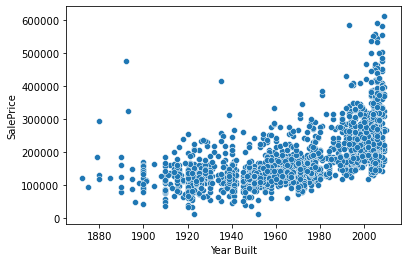

In [12]:
sns.scatterplot(x=train['Year Built'], y=train['SalePrice']);

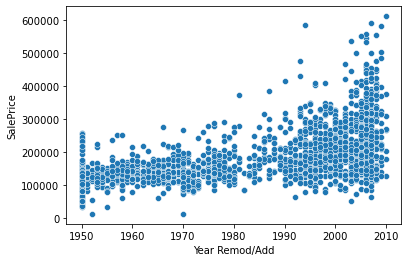

In [13]:
sns.scatterplot(x=train['Year Remod/Add'], y=train['SalePrice']);

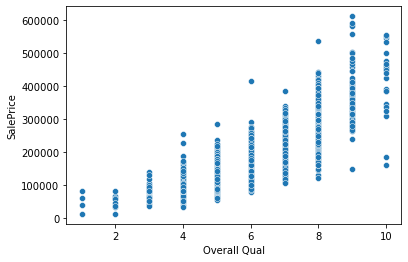

In [14]:
sns.scatterplot(x=train['Overall Qual'], y=train['SalePrice']);

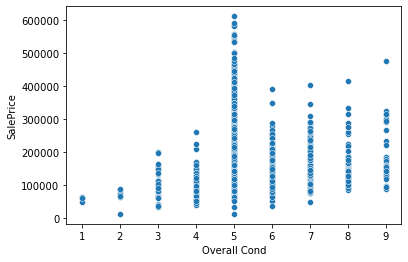

In [15]:
sns.scatterplot(x=train['Overall Cond'], y=train['SalePrice']);

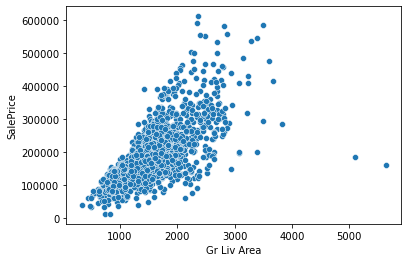

In [16]:
sns.scatterplot(x=train['Gr Liv Area'], y=train['SalePrice']);

**Two outliers here where Gr Liv Area > 5000**

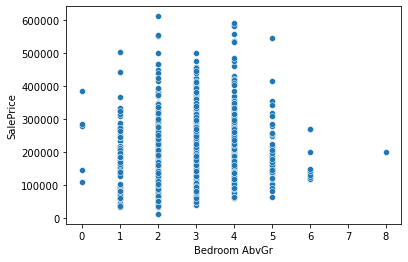

In [17]:
sns.scatterplot(x=train['Bedroom AbvGr'], y=train['SalePrice']);

**One outlier here with 8 bedrooms**

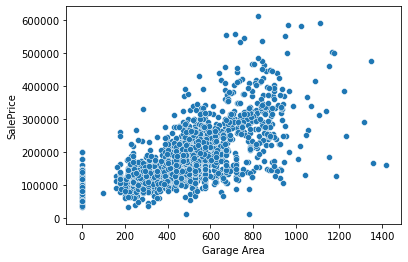

In [18]:
sns.scatterplot(x=train['Garage Area'], y=train['SalePrice']);

**Houses without garages show 0 for Garage Area**

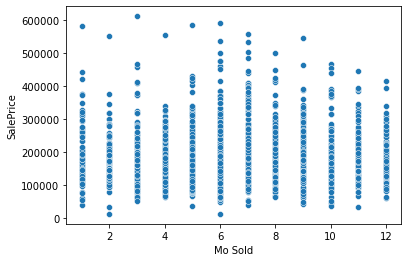

In [19]:
sns.scatterplot(x=train['Mo Sold'], y=train['SalePrice']);

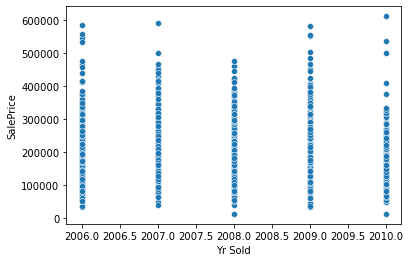

In [20]:
sns.scatterplot(x=train['Yr Sold'], y=train['SalePrice']);

In [39]:
by_neighborhood = train.groupby('Neighborhood').mean().sort_values(by='SalePrice', ascending=False)

In [50]:
train.groupby('Neighborhood')['SalePrice'].describe().sort_values(by='mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
StoneBr,38.0,329675.736842,128597.738212,130000.0,218125.0,322450.0,427085.0,591587.0
NridgHt,122.0,322831.352459,92964.835768,154000.0,259279.0,317500.0,379040.5,611657.0
NoRidge,48.0,316294.125000,67015.947652,190000.0,279875.0,300750.0,337750.0,584500.0
GrnHill,2.0,280000.000000,70710.678119,230000.0,255000.0,280000.0,305000.0,330000.0
Veenker,17.0,253570.588235,69147.647869,150000.0,192000.0,260000.0,290000.0,385000.0


In [51]:
train.groupby('Neighborhood')['SalePrice'].describe().sort_values(by='mean', ascending=False).tail()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
BrkSide,76.0,127022.697368,34825.975741,39300.0,109375.0,128000.0,139975.0,223500.0
OldTown,163.0,125276.300613,47882.265595,12789.0,104750.0,120000.0,140375.0,475000.0
BrDale,19.0,103371.052632,11262.318142,85400.0,93750.0,105500.0,111875.0,122500.0
IDOTRR,69.0,101103.188406,37891.222668,13100.0,72000.0,102000.0,126000.0,202500.0
MeadowV,24.0,100231.250000,21955.012365,73000.0,84875.0,92450.0,117250.0,151400.0


''

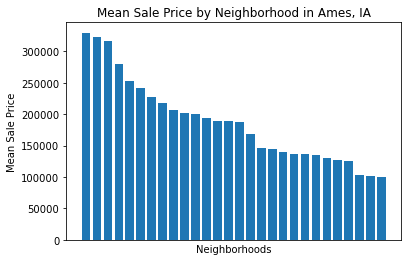

In [53]:
# With help from breakfast hour
plt.bar(x=by_neighborhood['SalePrice'].index, height= by_neighborhood['SalePrice'])
plt.title('Mean Sale Price by Neighborhood in Ames, IA')
plt.xlabel('Neighborhoods')
plt.ylabel('Mean Sale Price')
plt.xticks([])
;

**'Bedroom AbvGr', 'Mo Sold' and 'Yr Sold' seem to be evenly distributed, so I will drop them.**

### Dropping rows with 'Gr Liv Area' > 4000 per data description suggestion.

In [54]:
train = train[train['Gr Liv Area'] < 4000]

In [55]:
train.drop(columns=['Bedroom AbvGr', 'Mo Sold', 'Yr Sold'], inplace=True)
test.drop(columns=['Bedroom AbvGr', 'Mo Sold', 'Yr Sold'], inplace=True)

In [56]:
train['Garage Area'].fillna(0, inplace=True)
test['Garage Area'].fillna(0, inplace=True)

In [62]:
train.to_csv('../data/train_cleaned.csv')

In [63]:
test.to_csv('../data/test_cleaned.csv')